Modern cycling races, especially those tour races with multiple stages, often last for weeks, involving a series of races in diffenrent types. There are mainly one-day races (big start), individual time trials(ITT), and team time trials(TTT) in these big tours. In order to win the tour, a world tour team obviously needs different types of cyclists majoring in these different types of races to cope for potential situations, including the so-called time trial specialist, climber, sprinter, rouleur, and puncheur. Since these athletes are focusing on different competition targets and taking different trainings correspondingly, it is natural that they have different body power output patterns.
To describe or dicide how athletes perform in different races and situations, a metric called power curve has been applied in the field. The curve depicts the time an athlete can maintain at a certain power before losing the amount of power. In the old times, when smart power meters in bicycles cranks had not yet been widely applied, the best way to figure out someone's power curve was to find several points on it, and then fitting the curve accordingly. In order to reveal the all-round ability of a cyclist, usually four indexes are tested with his or her maximum effort, including the 5 seconds  representing the sprint ability, the 1 minute point representing anaerobic capacity, the 5 minutes point indicating the VO2max capability, as well as the FTP power. 
Actually, it is a feasible to tell the type of a cyclist by looking at his or her 

In [1110]:
# q-learning


In [1111]:
import numpy as np
epsilon = 0.9   # 贪婪度 greedy
alpha = 0.1     # 学习率
gamma = 0.8 

In [1112]:
#0编号 1转弯与否， 2地形, 3路程, 4出力状态（0正常，1功率超出，2疲劳补偿）
#实际state再加一个5剩余体力
states = []
states0=[[0,0,0,5],
        [1,1,0,3],
        [2,0,2,7],
        [3,1,2,8],
        [4,0,-2,4],
        [5,1,0,5],
        [6,0,0,9],
        [7,1,0,5],
        [8,0,0,6],
        [9,0,0,0.1]]
nstates =  np.array([[i+[0],i+[1],i+[2]] for i in states0])
nstates = nstates.reshape(30,5)
nstates = [list(i) for i in nstates]





In [1113]:
nstates

[[0.0, 0.0, 0.0, 5.0, 0.0],
 [0.0, 0.0, 0.0, 5.0, 1.0],
 [0.0, 0.0, 0.0, 5.0, 2.0],
 [1.0, 1.0, 0.0, 3.0, 0.0],
 [1.0, 1.0, 0.0, 3.0, 1.0],
 [1.0, 1.0, 0.0, 3.0, 2.0],
 [2.0, 0.0, 2.0, 7.0, 0.0],
 [2.0, 0.0, 2.0, 7.0, 1.0],
 [2.0, 0.0, 2.0, 7.0, 2.0],
 [3.0, 1.0, 2.0, 8.0, 0.0],
 [3.0, 1.0, 2.0, 8.0, 1.0],
 [3.0, 1.0, 2.0, 8.0, 2.0],
 [4.0, 0.0, -2.0, 4.0, 0.0],
 [4.0, 0.0, -2.0, 4.0, 1.0],
 [4.0, 0.0, -2.0, 4.0, 2.0],
 [5.0, 1.0, 0.0, 5.0, 0.0],
 [5.0, 1.0, 0.0, 5.0, 1.0],
 [5.0, 1.0, 0.0, 5.0, 2.0],
 [6.0, 0.0, 0.0, 9.0, 0.0],
 [6.0, 0.0, 0.0, 9.0, 1.0],
 [6.0, 0.0, 0.0, 9.0, 2.0],
 [7.0, 1.0, 0.0, 5.0, 0.0],
 [7.0, 1.0, 0.0, 5.0, 1.0],
 [7.0, 1.0, 0.0, 5.0, 2.0],
 [8.0, 0.0, 0.0, 6.0, 0.0],
 [8.0, 0.0, 0.0, 6.0, 1.0],
 [8.0, 0.0, 0.0, 6.0, 2.0],
 [9.0, 0.0, 0.0, 0.1, 0.0],
 [9.0, 0.0, 0.0, 0.1, 1.0],
 [9.0, 0.0, 0.0, 0.1, 2.0]]

In [1115]:
states = [0 for i in range(150*100)]
idx=0
for j in nstates:
        for i in np.arange(start=1,stop=1152001, step=11520):
                states[idx] = j+[i]
                idx+=1

In [1027]:

def get_next_state(state, action):
    '''对状态执行动作后，得到下一状态'''
    global states
    
    # left, right = -1,+1 # 一般来说是这样，不过要考虑首尾两个位置
    if state[-1][0] != states[-1][0]: # 除最后一个状态（位置），皆可向右(+1)
        index = state[-1][0]
        next_state = states[index+1][0].copy()
        
        next_remain = state[-1][5]-power_table[state[-1][0],actions.index(action)]
        
        state.append(next_state)
        state[-1].append(next_remain)
    else:
        next_state = state[-1]
        state.append(next_state)
    # if action=='ex':
    #     next_state[3] = 2
    # else:
    #     next_state[3] = 0
        
    return state

In [1028]:
import math

In [1029]:
rewards = [0 for i in range(len(states))]
def get_rewards(state, action):
    
    if len(state)>1 and state[-2][4]==1:
        state[-1][4]==2
    
    distance = state[-1][3]
    fatigue = state[-1][4]
    
    if fatigue!=2:
        P = action*72
    else:
        P = action*72*0.8
    W = 0
    Hnn = 350
    T = 20+273.15
    grade = state[-1][2]
    beta = math.atan(grade/100)
    mbike = 7.5
    mrider = 72
    Crv = 0.1
    Cr = 0.0033
    Crvn = 0.1*math.cos(beta)
    CdA = 0.2825
    Cm = 1
    rho0 = 1.2754
    p0 = 101000
    g = 9.8
        
    rho = rho0 * 273/T * math.exp(-rho0*9.8*Hnn/p0)
    Frg = g*(mbike+mrider)*(Cr*math.cos(beta)+math.sin(beta))
        
    a = (W**3-Crvn**3)/27 - W*(5*W*Crvn+8*Crvn**2/CdA/rho-6*Frg)/(9*CdA*rho)+2*Frg*Crvn/3/(CdA*rho)**2+P/(Cm*CdA*rho) 
            
    b = 2/(9*CdA*rho)*(3*Frg-4*W*Crvn-W**2*CdA*rho/2-2*Crvn/CdA/rho)
        
    if a**2+b**3>=0 and (a-(a**2+b**3)**0.5)>=0:
            V = (a+(a**2+b**3)**0.5)**(1/3) + (a-(a**2+b**3)**0.5)**(1/3) -2/3*(W+Crvn/CdA/rho)
    elif  a**2+b**3>=0 and (a-(a**2+b**3)**0.5)<0:
        V = (a+(a**2+b**3)**0.5)**(1/3) - ((a**2+b**3)**0.5-a)**(1/3) -2/3*(W+Crvn/CdA/rho)
    else:
        V = 2*(-b)**(0.5)*math.cos(1/3*math.acos(a/(-b**3)**0.5))-2/3*(W+Crvn/CdA/rho)
    V = V*3.6
    if V>=85:
        V=85
    time = distance/V
    reward = -time
    
    if action>=10:
        state[-1][4]==1
    
    return reward
    # return a,b,V*3.6

    

In [1030]:
actions = [0.000000000001,1,2,3,5,7,9,10,15]

power_table = np.zeros([len(states),len(actions)])
for i in range(len(states)):
    for j in range(len(actions)):
        power_table[i,j] = -get_rewards([states[i][0]],actions[j])*3600*actions[j]*72

In [1031]:
power_table

array([[2.06477579e-05, 5.27366004e+04, 8.05491147e+04, 1.03896881e+05,
        1.43880725e+05, 1.78699856e+05, 2.10292822e+05, 2.25191591e+05,
        2.93336342e+05],
       [1.23886547e-05, 3.16419603e+04, 4.83294688e+04, 6.23381284e+04,
        8.63284347e+04, 1.07219914e+05, 1.26175693e+05, 1.35114955e+05,
        1.76001805e+05],
       [2.17701970e-04, 1.42253022e+05, 1.69582928e+05, 1.97188032e+05,
        2.48477926e+05, 2.94966788e+05, 3.37841936e+05, 3.58202807e+05,
        4.52012120e+05],
       [2.48802252e-04, 1.62574882e+05, 1.93809061e+05, 2.25357751e+05,
        2.83974772e+05, 3.37104901e+05, 3.86105070e+05, 4.09374637e+05,
        5.16585280e+05],
       [3.28823328e-08, 2.66390590e+04, 4.73142700e+04, 6.52338142e+04,
        9.64434879e+04, 1.23887460e+05, 1.48901078e+05, 1.60721557e+05,
        2.14911187e+05],
       [2.06477579e-05, 5.27366004e+04, 8.05491147e+04, 1.03896881e+05,
        1.43880725e+05, 1.78699856e+05, 2.10292822e+05, 2.25191591e+05,
        2.9

In [1032]:
record=[]
def get_valid_actions(state):
    '''取当前状态下的合法动作集合，与rewards无关！'''
    global actions # [0,5,10,15,20,25]
    valid_actions =[]
    remain = state[-1][5]
    # print('remain:',remain)
    for i in range(len(actions)):
        if power_table[state[-1][0],i] <= remain:
            valid_actions.append(actions[i])
            record.append(remain-power_table[state[-1][0],i])
    return list(valid_actions)

In [1033]:

np.array([[0 for j in actions] for i in states])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [1034]:

import pandas as pd

q_table = pd.DataFrame(data=np.array([[0 for j in actions] for i in states]),
                    index=range(len(states)), columns=actions)
q_table


,1.000000e-12,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00,1.000000e+01,1.500000e+01
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0


In [1035]:
import time
def update_env(state):
    '''更新环境，并打印'''
    global states
    
    env = list('-' for i in range(len(states)))
    if state not in states[-1]:
        env[state[-1][0]] = 'o'
    print('\r{}'.format(''.join(env)), end='')


In [1036]:
import random
# 总共探索13次
for i in range(6000):
    # 0.从最左边的位置开始（不是必要的）
    state = [[0, 0, 0, 5, 0]]
    state[0].append(5*72*3200)
    update_env(state) # 环境相关
    total_steps = 0         # 环境相关   
    #current_state = random.choice(states) # 亦可随机
    while state[-1][0] != states[-1][0][0]:
        # 1.取当前状态下的合法动作中，随机（或贪婪）地选一个作为 当前动作
        # print(state[-1][-1])
        valid_actions = get_valid_actions(state)
        greedy_action = q_table.loc[state[-1][0]].sort_values(ascending=False).index
        if (random.uniform(0,1) > epsilon) or ((q_table.loc[state[-1][0]] == 0).all()):  # 探索
            current_action = random.choice(valid_actions)
        else:
            for j in greedy_action:
                if j in valid_actions:
                    current_action = j # 利用（贪婪）
        # 2.执行当前动作，得到下一个状态（位置）
        state = get_next_state(state, current_action)
        # 3.取下一个状态所有的Q value，待取其最大值
        next_state_q_values = q_table.loc[state[-1][0], get_valid_actions(state)]
        # 4.根据贝尔曼方程，更新 Q table 中当前状态-动作对应的 Q value
        rewards[state[-1][0]] = get_rewards(state,current_action)
        q_table.loc[state[-2][0], current_action] += alpha * (rewards[state[-1][0]] + gamma * next_state_q_values.max() - q_table.loc[state[-2][0], current_action])
        # # 5.进入下一个状态（位置）
        # current_state = next_state
        # update_env(state) # 环境相关
        total_steps += 1 
        # 环境相关
    print(i)
    print(state)
print('\nq_table:')
print(q_table)

o---------0
[[0, 0, 0, 5, 0, 1152000], [1, 1, 0, 3, 0, 1151999.9999793523], [2, 0, 2, 7, 0, 1016885.0453027976], [3, 1, 2, 8, 0, 658682.2379953086], [4, 0, -2, 4, 0, 433324.487010124], [5, 1, 0, 5, 0, 272602.9303969762], [6, 0, 0, 9, 0, 62310.107993495796], [7, 1, 0, 5, 0, 62310.10795632983], [8, 0, 0, 6, 0, 62310.10793568208], [9, 0, 0, 0.1, 0, 62310.10791090477]]
o---------1
[[0, 0, 0, 5, 0, 1152000], [1, 1, 0, 3, 0, 1151999.9999793523], [2, 0, 2, 7, 0, 1016885.0453027976], [3, 1, 2, 8, 0, 658682.2379953086], [4, 0, -2, 4, 0, 433324.487010124], [5, 1, 0, 5, 0, 272602.9303969762], [6, 0, 0, 9, 0, 62310.107993495796], [7, 1, 0, 5, 0, 62310.10795632983], [8, 0, 0, 6, 0, 62310.10793568208], [9, 0, 0, 0.1, 0, 62310.10791090477]]
o---------2
[[0, 0, 0, 5, 0, 1152000], [1, 1, 0, 3, 0, 1151999.9999793523], [2, 0, 2, 7, 0, 1065671.565229904], [3, 1, 2, 8, 0, 707468.7579224149], [4, 0, -2, 4, 0, 482111.00693723036], [5, 1, 0, 5, 0, 321389.4503240825], [6, 0, 0, 9, 0, 111096.62792060213], [7, 1

In [1037]:
plan=[]
for i in range(len(states)):
    maxd = max(q_table.loc[i])
    maxd = list(q_table.loc[i]).index(maxd)
    plan.append(actions[maxd])
    print(state[i][2],actions[maxd])


0 15
0 15
2 15
2 15
-2 15
0 15
0 15
0 10
0 15
0 1e-12


In [1038]:
plan = plan[:-1]
temp = np.array(states)[:,0]

In [1039]:
time_sum=0
for (i,action) in enumerate(plan):
    time = -get_rewards(temp[0:i+1],action)
    time_sum += time
time_sum

0.8137807331268977

In [1040]:
state

[[0, 0, 0, 5, 0, 1152000],
 [1, 1, 0, 3, 0, 1151999.9999793523],
 [2, 0, 2, 7, 0, 1151999.9999669637],
 [3, 1, 2, 8, 0, 1151999.9997492617],
 [4, 0, -2, 4, 0, 1151999.9995004593],
 [5, 1, 0, 5, 0, 1151999.9995004265],
 [6, 0, 0, 9, 0, 1151999.9994797788],
 [7, 1, 0, 5, 0, 1151999.9994426128],
 [8, 0, 0, 6, 0, 1151999.999421965],
 [9, 0, 0, 0.1, 0, 1151999.9993971877]]

In [1041]:
np.array(state).shape

(10, 6)

In [1042]:
states

[[[0, 0, 0, 5, 0], [0, 0, 0, 5, 1], [0, 0, 0, 5, 2]],
 [[1, 1, 0, 3, 0], [1, 1, 0, 3, 1], [1, 1, 0, 3, 2]],
 [[2, 0, 2, 7, 0], [2, 0, 2, 7, 1], [2, 0, 2, 7, 2]],
 [[3, 1, 2, 8, 0], [3, 1, 2, 8, 1], [3, 1, 2, 8, 2]],
 [[4, 0, -2, 4, 0], [4, 0, -2, 4, 1], [4, 0, -2, 4, 2]],
 [[5, 1, 0, 5, 0], [5, 1, 0, 5, 1], [5, 1, 0, 5, 2]],
 [[6, 0, 0, 9, 0], [6, 0, 0, 9, 1], [6, 0, 0, 9, 2]],
 [[7, 1, 0, 5, 0], [7, 1, 0, 5, 1], [7, 1, 0, 5, 2]],
 [[8, 0, 0, 6, 0], [8, 0, 0, 6, 1], [8, 0, 0, 6, 2]],
 [[9, 0, 0, 0.1, 0], [9, 0, 0, 0.1, 1], [9, 0, 0, 0.1, 2]]]

In [1043]:
m = math.log(19)
n = math.log(8)
p = math.log(4)
q = math.log(3.7)
a = (3*n)/209 - (1728*m)/155111 - p/295 + (4*q)/22705
b = (44928*m)/155111 - (301*n)/836 + (253*p)/3540 - (73*q)/68115
c = (1225*n)/836 - (216000*m)/155111 - (87*p)/1180 + (22*q)/22705
d = (172800*m)/155111 - (25*n)/209 + p/177 - q/13623

In [1044]:
from matplotlib import pyplot as plt
x = (np.arange(start=0.01, stop=10, step=0.1))
y = pd.Series([(a*i**3+b*i**2+c*i+d) for i in x])
# y.plot(logx=True)
# plt.plot(x,y)

In [1045]:
record

[1151999.9999793523,
 1099263.3995581311,
 1071450.8852791602,
 1048103.1192865992,
 1008119.2754175859,
 973300.1436061349,
 941707.1775965196,
 926808.4088724087,
 858663.6578129135,
 1151999.9999669637,
 1120358.039714231,
 1103670.5311468486,
 1089661.8715513118,
 1065671.565229904,
 1044780.0861430332,
 1025824.3065372641,
 1016885.0453027976,
 975998.1946671004,
 1151999.9999669637,
 1120358.039714231,
 1103670.5311468486,
 1089661.8715513118,
 1065671.565229904,
 1044780.0861430332,
 1025824.3065372641,
 1016885.0453027976,
 975998.1946671004,
 1016885.0450850956,
 874632.023756622,
 847302.1170236932,
 819697.0131907611,
 768407.119471971,
 721918.2573012859,
 679043.1094019194,
 658682.2379953086,
 564872.9250867076,
 1016885.0450850956,
 874632.023756622,
 847302.1170236932,
 819697.0131907611,
 768407.119471971,
 721918.2573012859,
 679043.1094019194,
 658682.2379953086,
 564872.9250867076,
 658682.2377465063,
 496107.3562282508,
 464873.1771049035,
 433324.487010124,
 37470

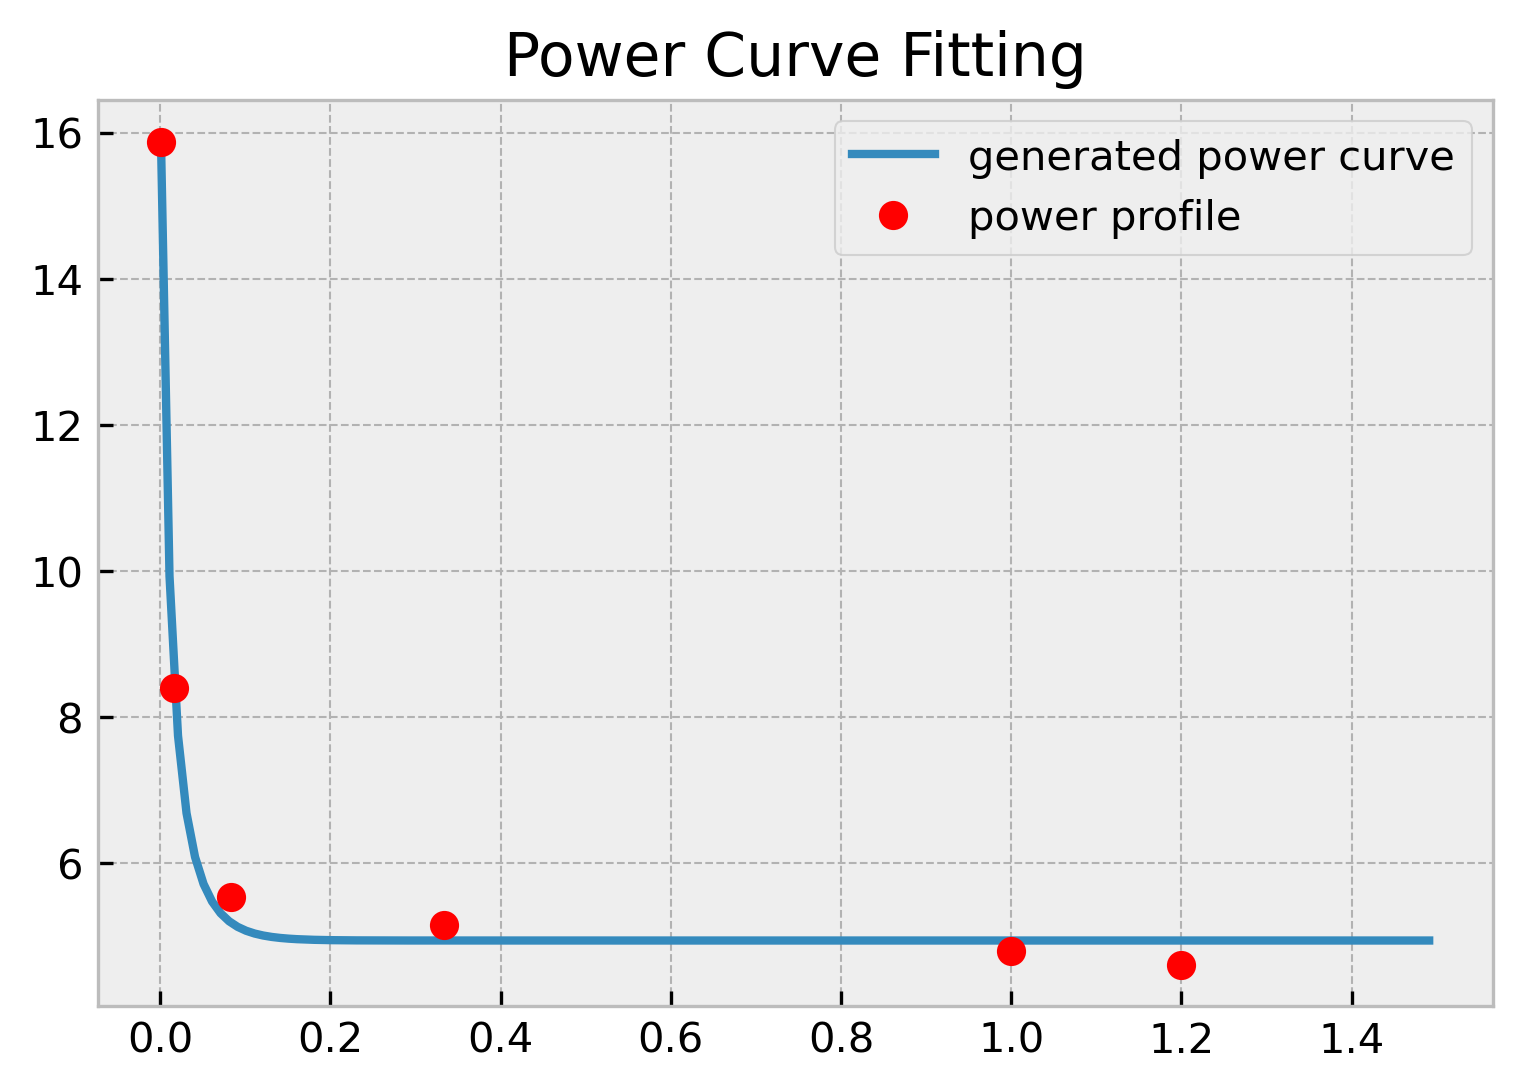

In [1]:

x = [1/720, 1/60, 1/12, 1/3,1,1.2]
# x = [i*3600 for i in x]
# y = [20, 8, 4, 3.7,3.2,3]
y = [15.88, 8.4, 5.53, 5.15,4.8,4.6]

from scipy.optimize import curve_fit
import numpy as np
def msigmoid(x,a,b,c):
    return (a/(1+b*np.exp(-(c*x))))


popt, pcov = curve_fit(msigmoid, x, y, method='dogbox')

def new_fitting(x):
    if x>=1/720:
        return (popt[0]/(1+popt[1]*np.exp(-(popt[2]*x))))
    else:
        return y[0]
    
from matplotlib import pyplot as plt
xs = (np.arange(start=0.001, stop=1.5, step=0.01))
ys = [new_fitting(i) for i in xs]
# ylg = pd.Series(ys)
# ylg.plot(logx=True)
# yo = pd.Series(y)
# yo.plot(logx=True)
plt.figure(dpi=300)
plt.style.use('bmh')
plt.title('Power Curve Fitting')
plt.plot(xs,ys,label='generated power curve')
plt.plot(x,y,'ro',label='power profile')
plt.legend()
plt.savefig('Power Curve Fitting.jpg')



In [14]:
from scipy import integrate
v, err = integrate.quad(new_fitting, 0, 1)
v

5.129714175398057

In [ ]:
initialize Q = {}; 
    while Q not converged:
    initialize cyclist state S, start a new time trial;
    while S != ending subsection： 
        with strategy π, get action a=π(S); 
        take action a, get new state S'(S, a) and reward R(S, a); 
        update Q by \mathbit{Q}[\mathbit{S},\mathbit{A}] ← (1-α)*Q[S,A] + α*(R(S,a) + γ* max Q[S',a]);
        S ← S';


initialize Q = {}; 
    while Q not converged:
    initialize cyclist state S, start a new time trial;
    while S != ending subsection： 
        with strategy π, get action a=π(S); 
        take action a, get new state S'(S, a) and reward R(S, a); 
        update Q by \mathbit{Q}[\mathbit{S},\mathbit{A}] ← (1-α)*Q[S,A] + α*(R(S,a) + γ* max Q[S',a]);
        S ← S';

In [47]:
import math
def wind(state, action):
    
    if len(state)>1 and state[-2][4]==1:
        state[-1][4]==2
    
    distance = state[-1][3]
    fatigue = state[-1][4]
    
    if fatigue!=2:
        P = action*72
    else:
        P = action*72*0.8
    W = 6
    Hnn = 350
    T = 20+273.15
    grade = state[-1][2]
    beta = math.atan(grade/100)
    mbike = 7.5
    mrider = 72
    Crv = 0.1
    Cr = 0.0033
    Crvn = 0.1*math.cos(beta)
    CdA = 0.2825
    Cm = 1
    rho0 = 1.2754
    p0 = 101000
    g = 9.8
        
    rho = rho0 * 273/T * math.exp(-rho0*9.8*Hnn/p0)
    Frg = g*(mbike+mrider)*(Cr*math.cos(beta)+math.sin(beta))
        
    a = (W**3-Crvn**3)/27 - W*(5*W*Crvn+8*Crvn**2/CdA/rho-6*Frg)/(9*CdA*rho)+2*Frg*Crvn/3/(CdA*rho)**2+P/(Cm*CdA*rho) 
            
    b = 2/(9*CdA*rho)*(3*Frg-4*W*Crvn-W**2*CdA*rho/2-2*Crvn/CdA/rho)
        
    if a**2+b**3>=0 and (a-(a**2+b**3)**0.5)>=0:
            V = (a+(a**2+b**3)**0.5)**(1/3) + (a-(a**2+b**3)**0.5)**(1/3) -2/3*(W+Crvn/CdA/rho)
    elif  a**2+b**3>=0 and (a-(a**2+b**3)**0.5)<0:
        V = (a+(a**2+b**3)**0.5)**(1/3) - ((a**2+b**3)**0.5-a)**(1/3) -2/3*(W+Crvn/CdA/rho)
    else:
        V = 2*(-b)**(0.5)*math.cos(1/3*math.acos(a/(-b**3)**0.5))-2/3*(W+Crvn/CdA/rho)
    V = V*3.6
    if V>=85:
        V=85
    time = distance/V
    reward = -time
    
    if action>=10:
        state[-1][4]==1
    
    return V,time

In [48]:
def no_wind(state, action):
    
    if len(state)>1 and state[-2][4]==1:
        state[-1][4]==2
    
    distance = state[-1][3]
    fatigue = state[-1][4]
    
    if fatigue!=2:
        P = action*72
    else:
        P = action*72*0.8

    Hnn = 350
    T = 20+273.15
    W=0
    grade = state[-1][2]
    beta = math.atan(grade/100)
    mbike = 7.5
    mrider = 72
    Crv = 0.1
    Cr = 0.0033
    Crvn = 0.1*math.cos(beta)
    CdA = 0.2825
    Cm = 1
    rho0 = 1.2754
    p0 = 101000
    g = 9.8
        
    rho = rho0 * 273/T * math.exp(-rho0*9.8*Hnn/p0)
    Frg = g*(mbike+mrider)*(Cr*math.cos(beta)+math.sin(beta))
        
    a = (W**3-Crvn**3)/27 - W*(5*W*Crvn+8*Crvn**2/CdA/rho-6*Frg)/(9*CdA*rho)+2*Frg*Crvn/3/(CdA*rho)**2+P/(Cm*CdA*rho) 
            
    b = 2/(9*CdA*rho)*(3*Frg-4*W*Crvn-W**2*CdA*rho/2-2*Crvn/CdA/rho)
        
    if a**2+b**3>=0 and (a-(a**2+b**3)**0.5)>=0:
            V = (a+(a**2+b**3)**0.5)**(1/3) + (a-(a**2+b**3)**0.5)**(1/3) -2/3*(W+Crvn/CdA/rho)
    elif  a**2+b**3>=0 and (a-(a**2+b**3)**0.5)<0:
        V = (a+(a**2+b**3)**0.5)**(1/3) - ((a**2+b**3)**0.5-a)**(1/3) -2/3*(W+Crvn/CdA/rho)
    else:
        V = 2*(-b)**(0.5)*math.cos(1/3*math.acos(a/(-b**3)**0.5))-2/3*(W+Crvn/CdA/rho)
    V = V*3.6
    if V>=85:
        V=85
    time = distance/V
    reward = -time
    
    if action>=10:
        state[-1][4]==1
    
    return V,time

In [49]:
no_wind([[0.0, 0.0, 0.0, 5.0, 0.0]],7)

(50.76668881034112, 0.09848977975852356)

In [50]:
actions = [3,5,7,9]
import numpy as np
for action in actions:
    print(
        (np.array([wind([[0.0, 0.0, 0.0, 5.0, 0.0]],action)])-np.array([no_wind([[0.0, 0.0, 0.0, 5.0, 0.0]],action)]))/np.array([no_wind([[0.0, 0.0, 0.0, 5.0, 0.0]],action)])
    )


[[-0.31843542  0.46721239]]
[[-0.27499102  0.37929327]]
[[-0.24899097  0.33154191]]
[[-0.23092207  0.30025834]]
